In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

params = {
    'figure.figsize': (8.5, 6.5),
    'font.style': 'normal',
    'axes.labelsize': 25,
    'font.size': 16,
    'legend.fontsize': 11,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 10,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'font.family': 'serif',
    'legend.framealpha': 1,  # Set legend alpha to 1
    'legend.borderpad': 0.2,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
}
plt.rcParams.update(params)

--------- Quadratic Example -----------

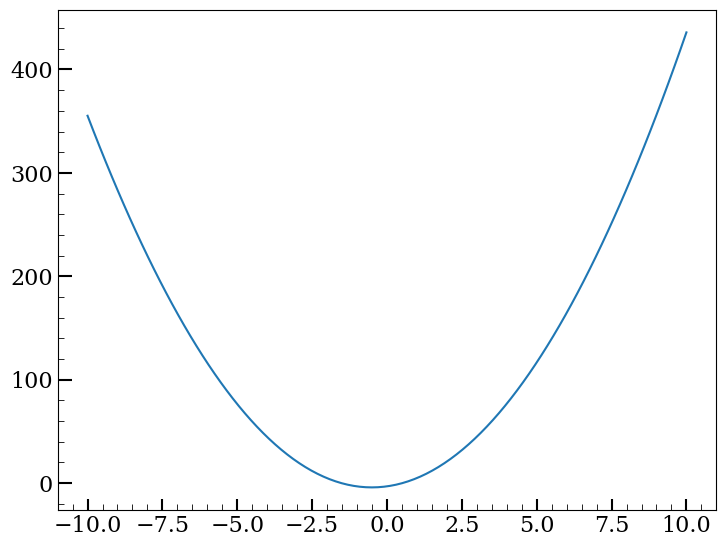

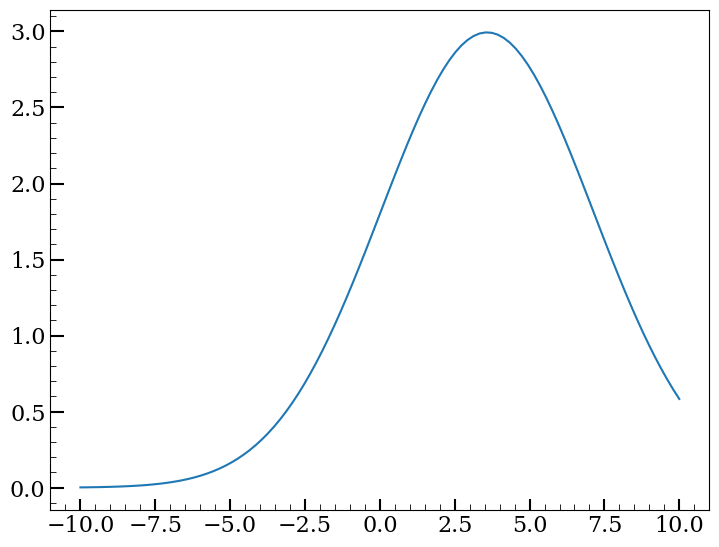

In [2]:
def gaussian_function(x, a, b, c):
    return a * np.exp(-((x - b) ** 2) / (2 * c ** 2))


def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

# def data_generator(function, x_range, num_points, **kwargs):
#     x = np.linspace(x_range[0], x_range[1], num_points)
#     y = function(x, **kwargs)
#     return x, y

def data_generator_quadratic():
    x = np.linspace(-10, 10, 100)


    a, b, c = np.random.uniform(-5, 5, size=3)
    fun = quadratic_function(x, a, b, c)


    return (x, np.asarray(fun)), [a, b, c]


def data_generator_gaussian():
    x = np.linspace(-10, 10, 100)

    a, b, c = np.random.uniform(0.1, 5, size=3)
    fun = gaussian_function(x, a, b, c)

    return (x, np.asarray(fun)), [a, b, c]


x, default = data_generator_quadratic()
x_gaus, default_gaus = data_generator_gaussian()

plt.plot(x[0], x[1])
plt.show()
plt.plot(x_gaus[0], x_gaus[1])
plt.show()

In [3]:
default_args = {
    'allowed_symbols': "pow,add,sub,mul,aq,constant,variable",
    'epsilon': 10**(-4),
    'objectives': ['r2', 'length'],
    'max_evaluations': 100000000,
    'max_length': 100,
    'max_time': 1800,
    'n_threads': 10
}

name = "Quadratic Function Problem"

train, default_coeff_train = data_generator_quadratic()
test, default_coeff_test = data_generator_quadratic()


In [4]:
from main import Problem
Problem_ = Problem(name, train, test, default_args)

<Axes: title={'center': 'Quadratic Function Problem train'}, xlabel='X-axis', ylabel='Y-axis'>

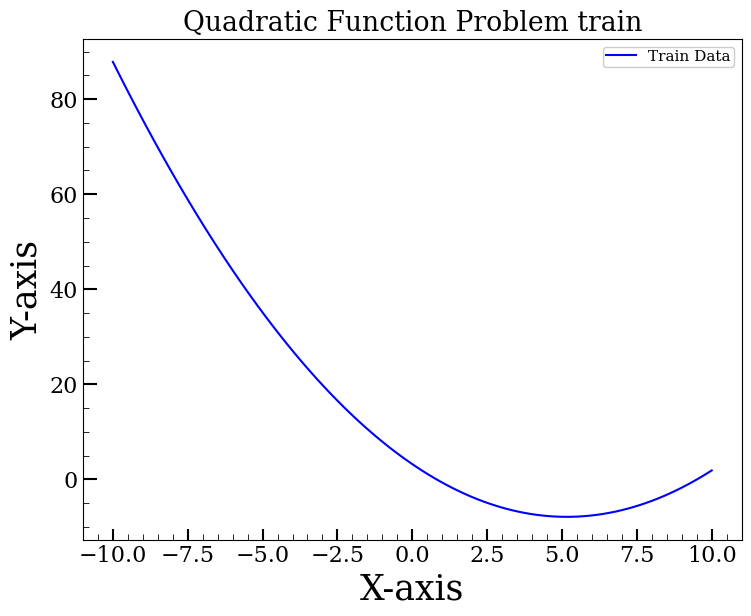

In [5]:
Problem_.plot_data(train=True)

In [6]:
Problem_.solve()

dict_keys(['model', 'variables', 'length', 'complexity', 'tree', 'objective_values', 'mean_squared_error', 'minimum_description_length', 'bayesian_information_criterion', 'akaike_information_criterion']) <class 'dict'>
[-0.7965227365493774, 5.0], 8141.47, (17.380422592163 + (3.857858419418 * ((-1.114187955856) * X1))), 160.51
[-0.982555627822876, 7.0], 815.85, ((-12.384616851807) + (18.493158340454 * (2.302585124969 ^ ((-0.209992989898) * X1)))), 13.76
[-0.9999998211860657, 9.0], 138.53, (3.201276302338 + (2.481549263000 * (((1.472775220871 * X1) * (0.114084266126 * X1)) - (1.731743574142 * X1)))), 0.00
[-1.0, 11.0], 147.88, (3.209128379822 + (2.121881008148 * ((((1.721463680267 * X1) * (0.114084266126 * X1)) - (1.721463680267 * X1)) + ((-0.304105103016) * X1)))), 0.00


<Axes: title={'center': 'Quadratic Function Problem: solution 3 Train'}>

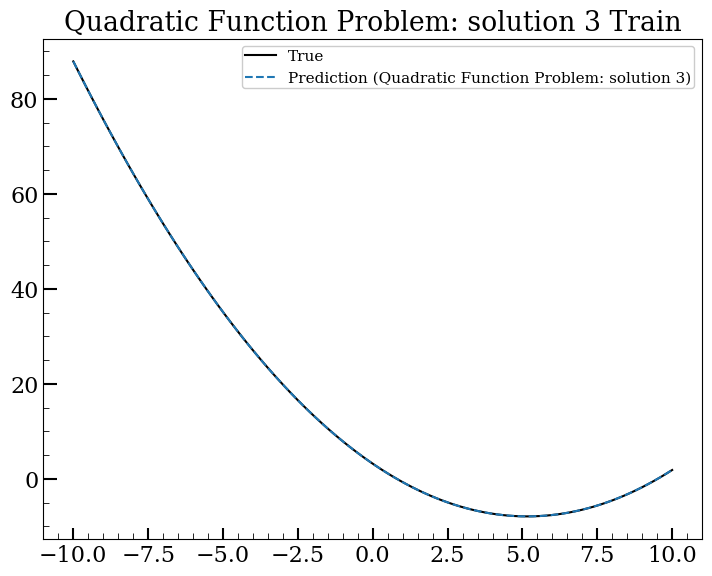

In [7]:
Problem_.solutions[-1].plot_results()

In [8]:
Problem_.solutions[-1].display_expression(), Problem_.solutions[-1].extract_and_format()

<IPython.core.display.Math object>

(None,
 ('X1*b3 + X1**b2*b1 + b0',
  {'b0': 3.209128379822,
   'b1': 0.41672028652964505,
   'b2': 2.0,
   'b3': -4.29801593194565},
  X1*b3 + X1**b2*b1 + b0))

<Axes: title={'center': 'Quadratic Function Problem - Length vs MSE'}, xlabel='Minimal Description Length (MDL)', ylabel='MSE'>

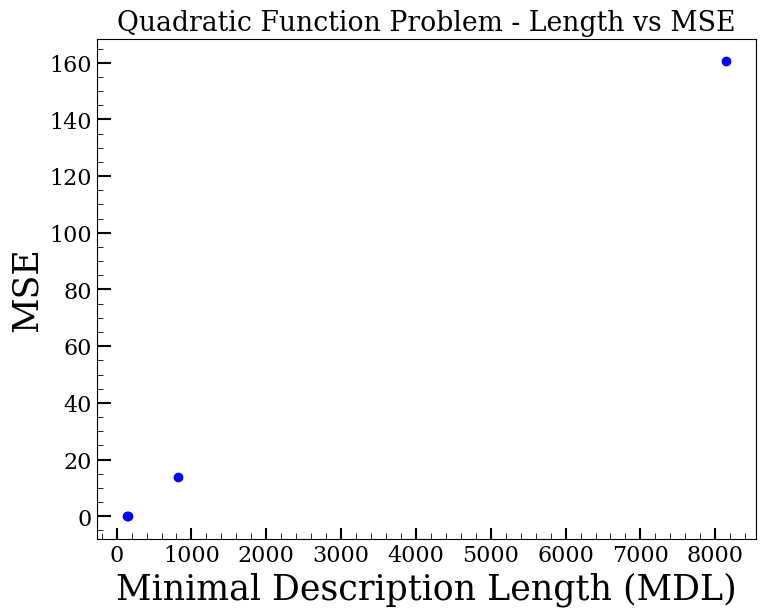

In [9]:
Problem_.plot_mdl_vs_mse()

-------- Gaussian Example ----------

In [10]:
name_g = "Gaussian Function Problem"

gaussian_args = {
    'allowed_symbols': "add,sub,mul,aq,constant,variable,exp",
    'epsilon': 10**(-4),
    'objectives': ['r2', 'length'],
    'max_evaluations': 100000000,
    'max_length': 100,
    'max_time': 1800,
    'n_threads': 10
}


train_g, default_coeff_train_g = data_generator_gaussian()
test_g, default_coeff_test_g = data_generator_gaussian()

Problem_g = Problem(name_g, train_g, test_g, gaussian_args)

<Axes: title={'center': 'Gaussian Function Problem train'}, xlabel='X-axis', ylabel='Y-axis'>

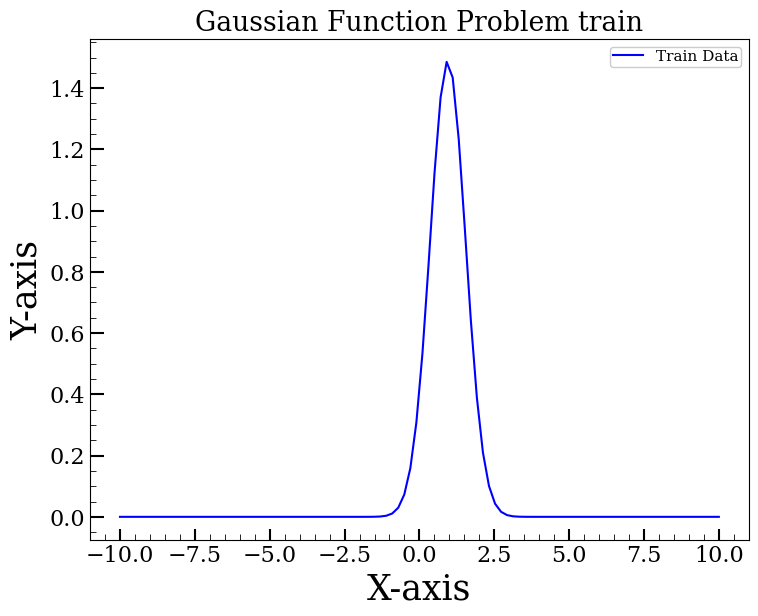

In [11]:
Problem_g.plot_data(train=True)

In [12]:
Problem_g.solve()

dict_keys(['model', 'variables', 'length', 'complexity', 'tree', 'objective_values', 'mean_squared_error', 'minimum_description_length', 'bayesian_information_criterion', 'akaike_information_criterion']) <class 'dict'>
[-0.003071623621508479, 5.0], 105.10, (0.109401881695 + ((-0.003491304815) * ((-0.874658226967) * X1))), 0.10
[-0.03428732603788376, 6.0], 108.11, (0.153178006411 + ((-0.014693134464) * exp(((-0.279981255531) * X1)))), 0.10
[-0.3803079128265381, 7.0], 107.38, ((-0.155753314495) + ((-3.267725944519) * ((-0.249350413680) / (sqrt(1 + ((-0.874658226967) * X1) ^ 2))))), 0.06
[-0.4269994795322418, 8.0], 111.97, ((-0.009522449225) + (0.692413926125 * exp(((0.318309873343 * X1) * ((-0.819785594940) * X1))))), 0.06
[-0.9323498010635376, 9.0], 112.80, ((-0.122357122600) + ((-3.716470241547) * ((-0.465761363506) / (sqrt(1 + ((3.042273044586 * X1) + (-2.845376253128)) ^ 2))))), 0.01
[-0.9714176654815674, 10.0], 117.62, ((-0.125062793493) + (0.076949790120 * exp((3.141592741013 / (sq

<Axes: title={'center': 'Gaussian Function Problem - Length vs MSE'}, xlabel='Minimal Description Length (MDL)', ylabel='MSE'>

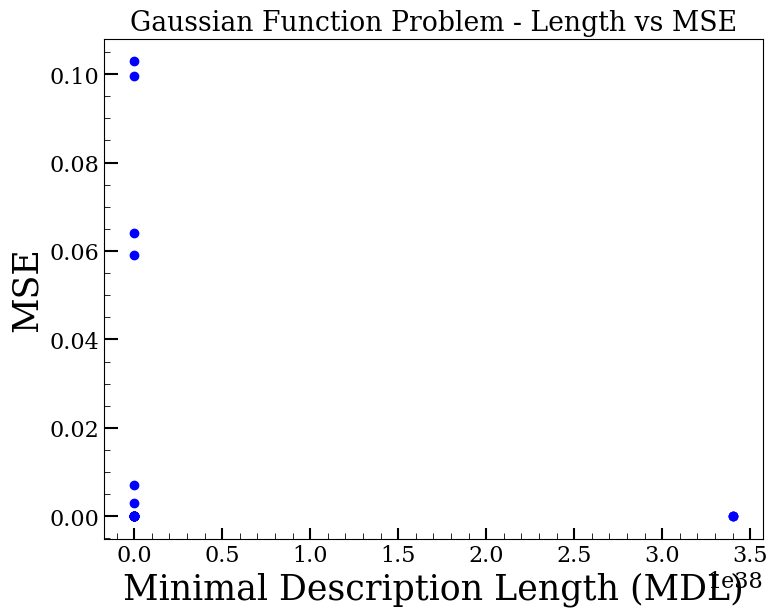

In [13]:
Problem_g.plot_mdl_vs_mse()

<IPython.core.display.Math object>

<Axes: title={'center': 'Gaussian Function Problem: solution 4 Train'}>

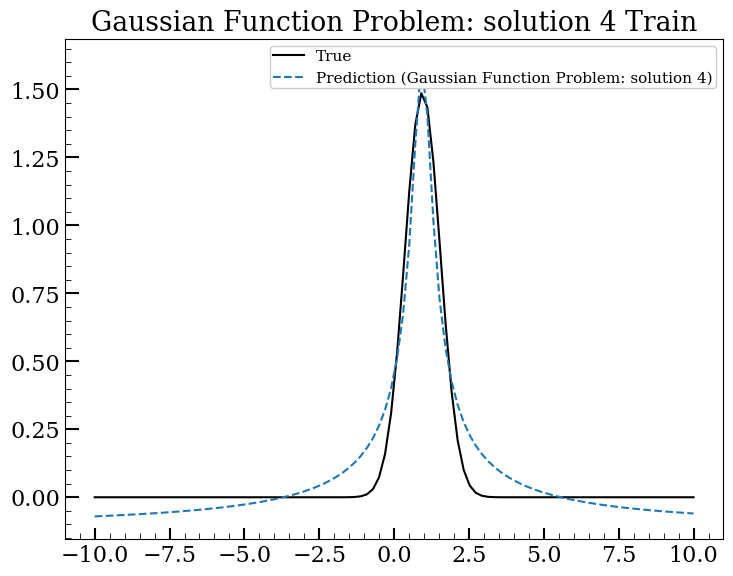

In [14]:
n=4
Problem_g.solutions[n].display_expression(), Problem_g.solutions[n].extract_and_format()
Problem_g.solutions[n].plot_results()